In [1]:
import uncertainties
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
from scipy.optimize import minimize
from scipy import stats
import math
from autograd import hessian
import autograd.numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
from importlib.machinery import SourceFileLoader
import uproot  as up

In [3]:
index=1

comp_tag = {'sig': 1, 'comb': 2, 'misid': 3, 'low': 4, 'low_misid': 5, 'low_Bs2DKPi': 6}



In [4]:

diff_all = []
error_all = []
gen_all = []
for index in range(1, 101):
    diff = {}
    error = {}    
    config_mass_shape_output = SourceFileLoader('config_mass_shape_output', '/software/pc24403/PCBPGGSZ/outputs/toy/mass_fit/config/lhcb/1x/%s'%(f'config_cpfit_output_{index}.py')).load_module()

    varDict = config_mass_shape_output.getconfig()
    print_yields = True
    sig_yield = {}
    Bdecays = ['b2dk', 'b2dpi']
    Types = ['LL', 'DD']
    for bdecay in Bdecays:
        for Type in Types:
            decay = ''
            new_decay = ''

            if bdecay == 'b2dk':
                decay = 'DK_KsPiPi_%s'%Type
                new_decay = 'b2dk_%s'%Type
            elif bdecay == 'b2dpi':
                decay = 'DPi_KsPiPi_%s'%Type
                new_decay = 'b2dpi_%s'%Type


            file_name = f'/software/pc24403/PCBPGGSZ/outputs/toy/1x/{new_decay}_{index}.root:DalitzEventList'
            tree = up.open(file_name)
            exp = {}
            for comp in comp_tag:
                array = tree.arrays('tagmode','(B_M>5150) & (tagmode==%d)'%comp_tag[comp])
                exp[comp] = len(array)
                if comp == 'sig' and bdecay == 'b2dk' and Type == 'LL':
                    gen_all.append(exp[comp])
            #print(f'{decay} {comp} {exp[comp]}')
            

            #print yields
            if print_yields == True:
                #print('Yields:')
                #print('Sig: %.2f'%varDict['n_sig_%s'%decay])
                diff['n_sig_%s'%decay] = varDict['n_sig_%s'%decay] - exp['sig']
                error['n_sig_%s'%decay] = varDict['n_sig_%s_err'%decay]
                #print('MisID: %.2f'%varDict['n_misid_%s'%decay])
                diff['n_misid_%s'%decay] = varDict['n_misid_%s'%decay] - exp['misid']
                #print('Low: %.2f'%varDict['n_low_%s'%decay])
                diff['n_low_%s'%decay] = varDict['n_low_%s'%decay] - exp['low']
                #error['n_low_%s'%decay] = varDict['n_low_%s_err'%decay]
                #print('Comb: %.2f'%varDict['n_comb_%s'%decay])
                diff['n_comb_%s'%decay] = varDict['n_comb_%s'%decay] - exp['comb']
                error['n_comb_%s'%decay] = varDict['n_comb_%s_err'%decay]
                if bdecay == 'b2dk':
                    #print('Low MisID: %.2f'%varDict['n_low_misID_%s'%decay])
                    diff['n_low_misID_%s'%decay] = varDict['n_low_misID_%s'%decay] - exp['low_misid']
                    #print('Low Bs2DKPi: %.2f'%varDict['n_low_Bs2DKPi_%s'%decay])
                    diff['n_low_Bs2DKPi_%s'%decay] = varDict['n_low_Bs2DKPi_%s'%decay] - exp['low_Bs2DKPi']
                    sum_yields = varDict['n_sig_%s'%decay] + varDict['n_misid_%s'%decay] + varDict['n_low_%s'%decay] + varDict['n_comb_%s'%decay] + varDict['n_low_misID_%s'%decay] + varDict['n_low_Bs2DKPi_%s'%decay]
                    diff['sum_%s'%decay] = sum_yields - exp['sig'] - exp['misid'] - exp['low'] - exp['comb'] - exp['low_misid'] - exp['low_Bs2DKPi']

                else:
                    sum_yields = varDict['n_sig_%s'%decay] + varDict['n_misid_%s'%decay] + varDict['n_low_%s'%decay] + varDict['n_comb_%s'%decay]
                    diff['sum_%s'%decay] = sum_yields - exp['sig'] - exp['misid'] - exp['low'] - exp['comb']
                #print('Sum: %.2f'%sum_yields)
            
    diff_all.append(diff)
    error_all.append(error)

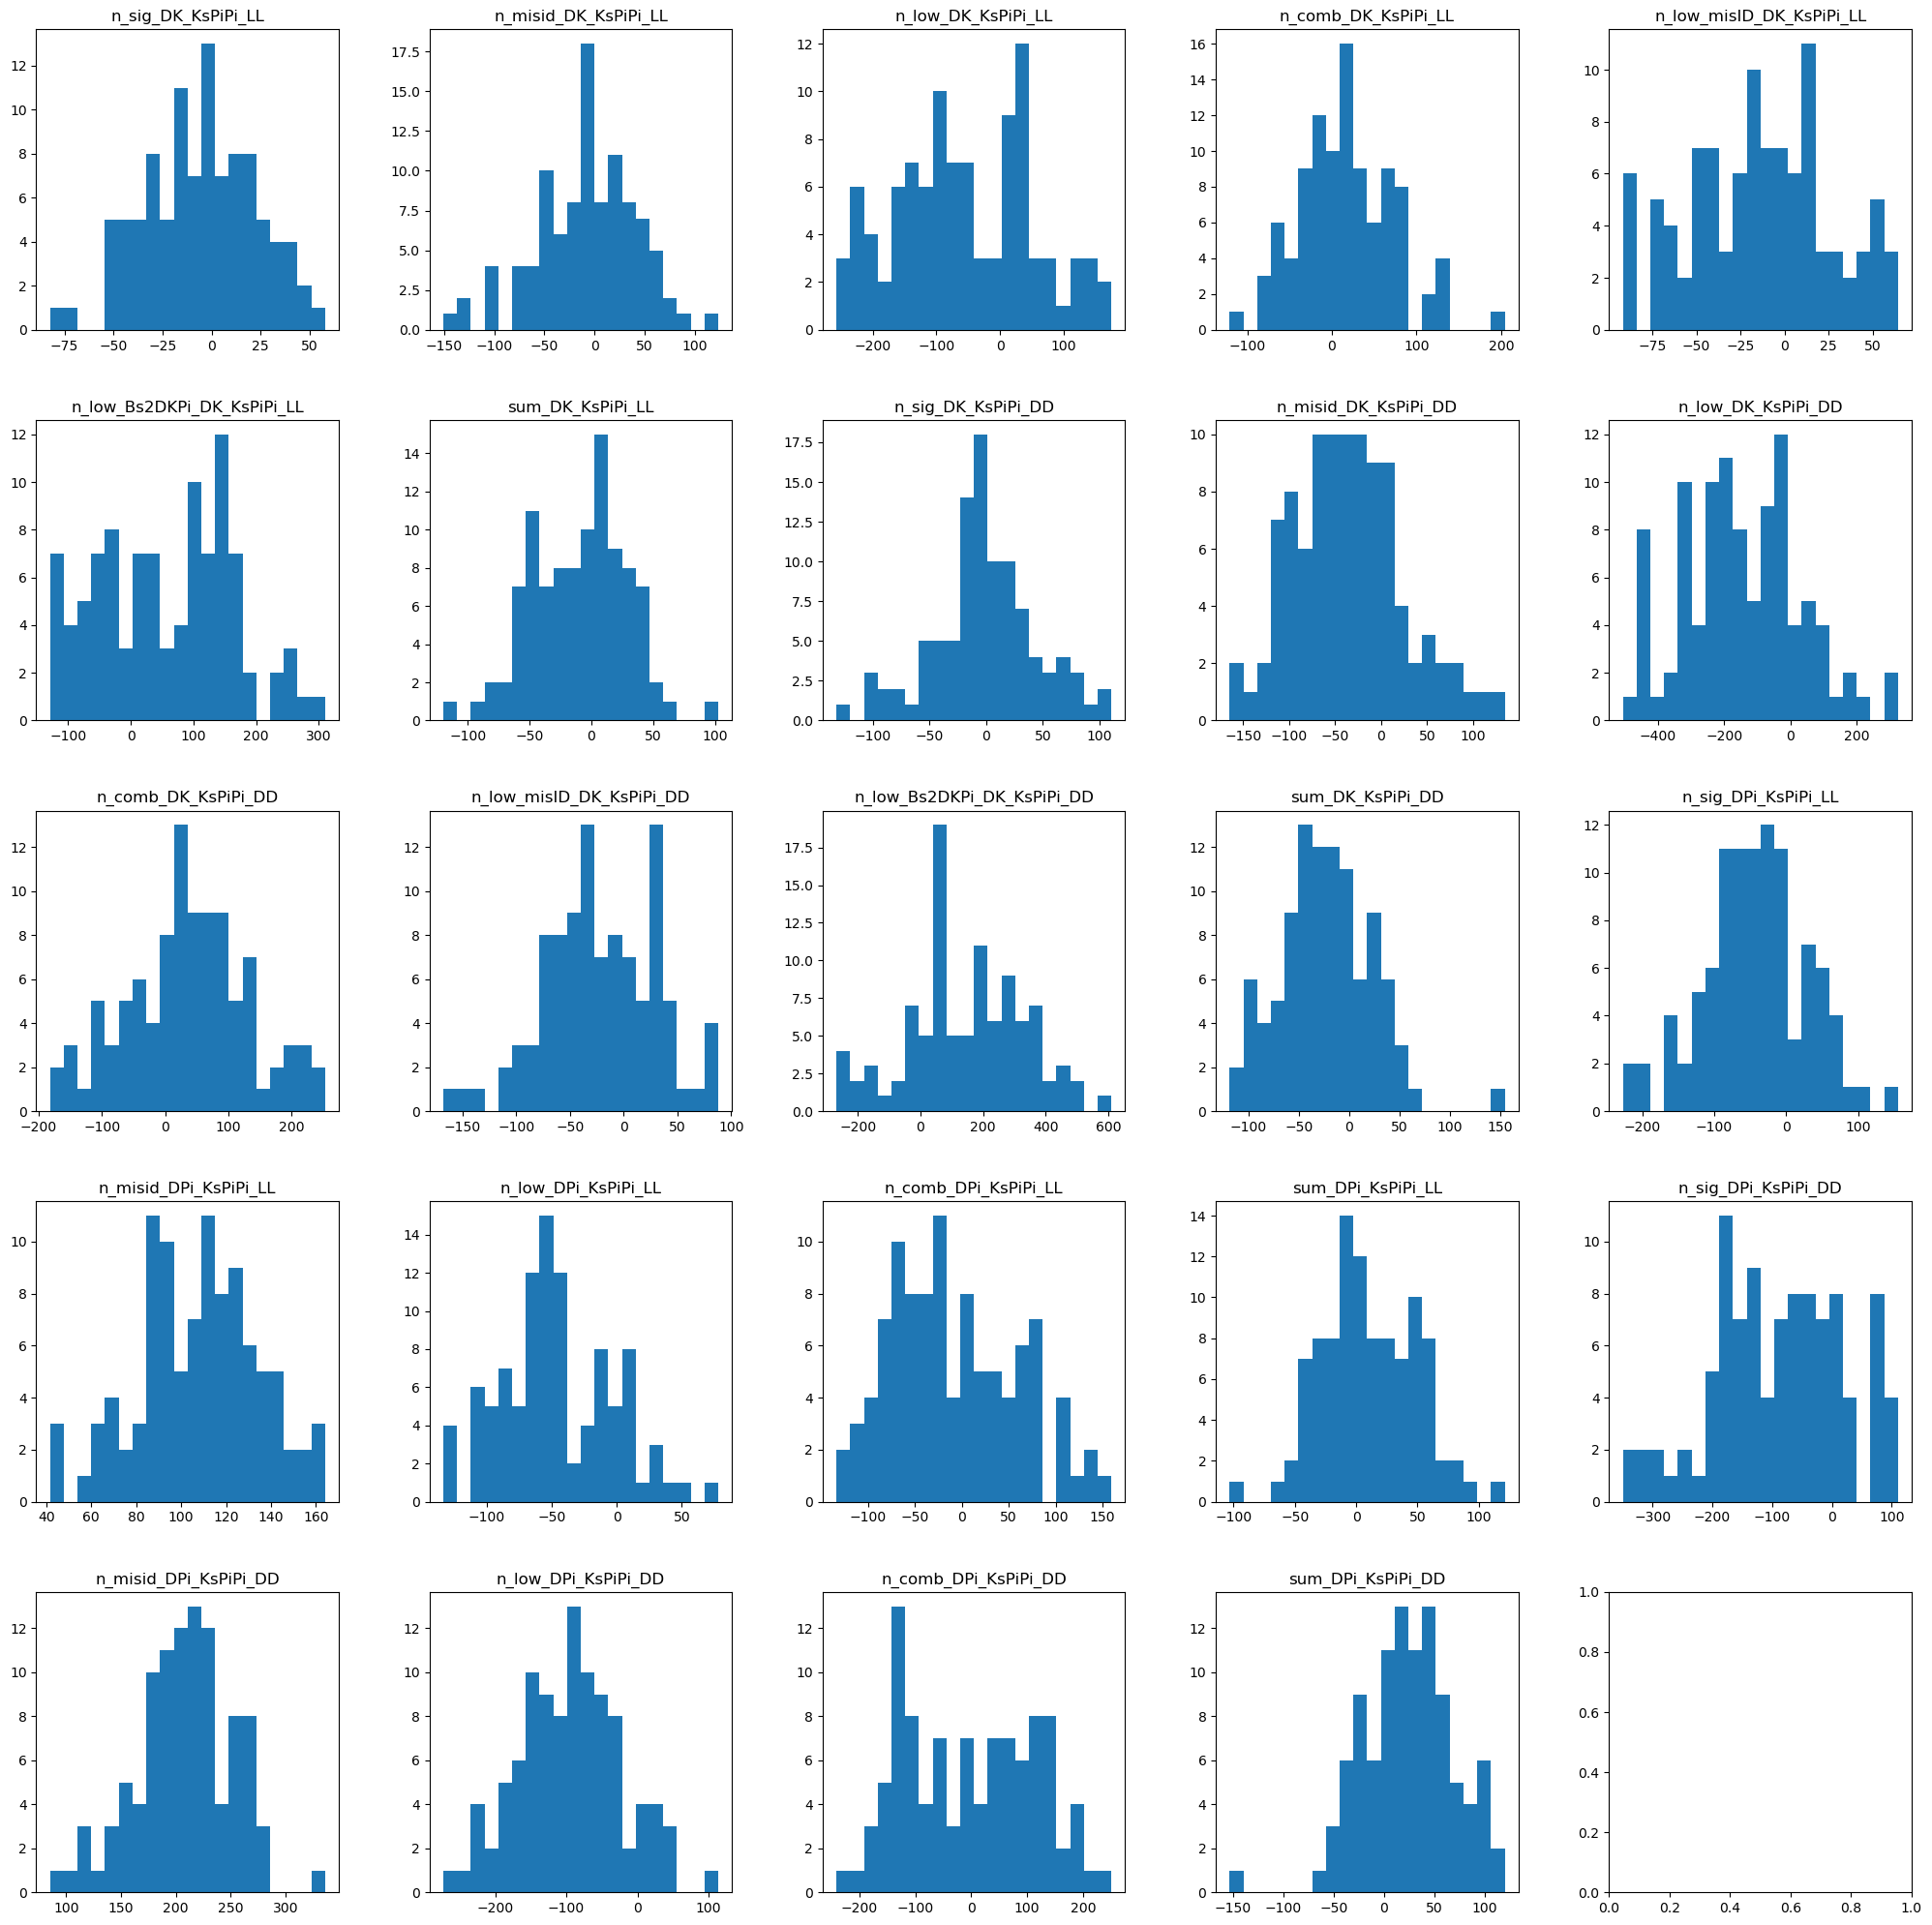

In [5]:
len(diff_all[0].keys())
#create the subplots with the 3*4 plots
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
fig.subplots_adjust(hspace = 0.3, wspace=.3)
axs = axs.ravel()
for i, key in enumerate(diff_all[0].keys()):
    values = [error[key] for error in diff_all]
    axs[i].hist(values, bins=20)
    axs[i].set_title(key)